In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
enrichment = pd.read_csv("enrichment_MS_summary.csv",usecols = [0,1,2,3,4,5,6],header = None)
enrichment.columns = ["Groups","Sensitivity","Specificity","Accuracy","Precision","F1_score","Num_motifs"]
greedy = pd.read_csv("greedy_result.csv",usecols = [0,1,2,3,4,5,6],header = None)
greedy.columns = ["Groups","Sensitivity","Specificity","Accuracy","Precision","F1_score","Num_motifs"]
p_value = pd.read_csv("p_value_result.csv",usecols = [0,1,2,3,4,5,6],header = None)
p_value.columns = ["Groups","Sensitivity","Specificity","Accuracy","Precision","F1_score","Num_motifs"]
RF_filtering = pd.read_csv("RF_filtering_result.csv",usecols = [0,1,2,3,4,5,6],header = None)
RF_filtering.columns = ["Groups","Sensitivity","Specificity","Accuracy","Precision","F1_score","Num_motifs"]
RILP = pd.read_csv("RILP_result.csv",usecols = [0,1,2,3,4,5,6],header = None)
RILP.columns = ["Groups","Sensitivity","Specificity","Accuracy","Precision","F1_score","Num_motifs"]
Tabu_PNPSC = pd.read_csv("Tabu_PNPSC_result.csv",usecols = [0,1,2,3,4,5,6],header = None)
Tabu_PNPSC.columns = ["Groups","Sensitivity","Specificity","Accuracy","Precision","F1_score","Num_motifs"]

In [2]:
enrichment

,Groups,Sensitivity,Specificity,Accuracy,Precision,F1_score,Num_motifs
0,E2F,0.865200,0.775900,0.820550,0.794336,0.828236,8
1,HNF4,0.766800,0.696100,0.731450,0.716198,0.740609,5
2,MYC,0.793800,0.691700,0.742750,0.720268,0.755238,10
3,GATA,0.642900,0.618400,0.630650,0.627607,0.635108,6
4,TFAP2,0.838800,0.866600,0.852700,0.862839,0.850630,2
5,IRF,0.824300,0.525000,0.674650,0.634557,0.717015,6
6,ETS,0.899100,0.743900,0.821500,0.778423,0.834365,9
7,NR3C1,0.747100,0.704400,0.725750,0.716660,0.731453,6
8,STAT,0.786100,0.494400,0.640250,0.608707,0.686074,7
9,ATF3,0.712309,0.921987,0.817148,0.901294,0.795589,4


In [2]:
enrichment_new = pd.melt(enrichment, value_vars=["Sensitivity","Specificity","Accuracy","Precision","F1_score","Num_motifs"],id_vars='Groups')
enrichment_new['method'] = "Enrichment"
greedy_new = pd.melt(greedy, value_vars=["Sensitivity","Specificity","Accuracy","Precision","F1_score","Num_motifs"],id_vars='Groups')
greedy_new['method'] = "Greedy"
p_value_new = pd.melt(p_value, value_vars=["Sensitivity","Specificity","Accuracy","Precision","F1_score","Num_motifs"],id_vars='Groups')
p_value_new['method'] = "Z-test"
RF_filtering_new = pd.melt(RF_filtering, value_vars=["Sensitivity","Specificity","Accuracy","Precision","F1_score","Num_motifs"],id_vars='Groups')
RF_filtering_new['method'] = "Random_Forest"
RILP_new = pd.melt(RILP, value_vars=["Sensitivity","Specificity","Accuracy","Precision","F1_score","Num_motifs"],id_vars='Groups')
RILP_new['method'] = "RILP"
Tabu_PNPSC_new = pd.melt(Tabu_PNPSC, value_vars=["Sensitivity","Specificity","Accuracy","Precision","F1_score","Num_motifs"],id_vars='Groups')
Tabu_PNPSC_new['method'] = "Tabu_PNPSC"

In [3]:
frames = [enrichment_new, greedy_new, RF_filtering_new,RILP_new,Tabu_PNPSC_new,p_value_new]
result = pd.concat(frames)
result

,Groups,variable,value,method
0,E2F,Sensitivity,0.865200,Enrichment
1,HNF4,Sensitivity,0.766800,Enrichment
2,MYC,Sensitivity,0.793800,Enrichment
3,GATA,Sensitivity,0.642900,Enrichment
4,TFAP2,Sensitivity,0.838800,Enrichment
5,IRF,Sensitivity,0.824300,Enrichment
6,ETS,Sensitivity,0.899100,Enrichment
7,NR3C1,Sensitivity,0.747100,Enrichment
8,STAT,Sensitivity,0.786100,Enrichment
9,ATF3,Sensitivity,0.712309,Enrichment


In [36]:
result.to_csv("result.csv")

In [4]:
test = pd.DataFrame()
test['Groups'] = enrichment['Groups']
test['value'] = 2
test

,Groups,value
0,E2F,2
1,HNF4,2
2,MYC,2
3,GATA,2
4,TFAP2,2
5,IRF,2
6,ETS,2
7,NR3C1,2
8,STAT,2
9,ATF3,2


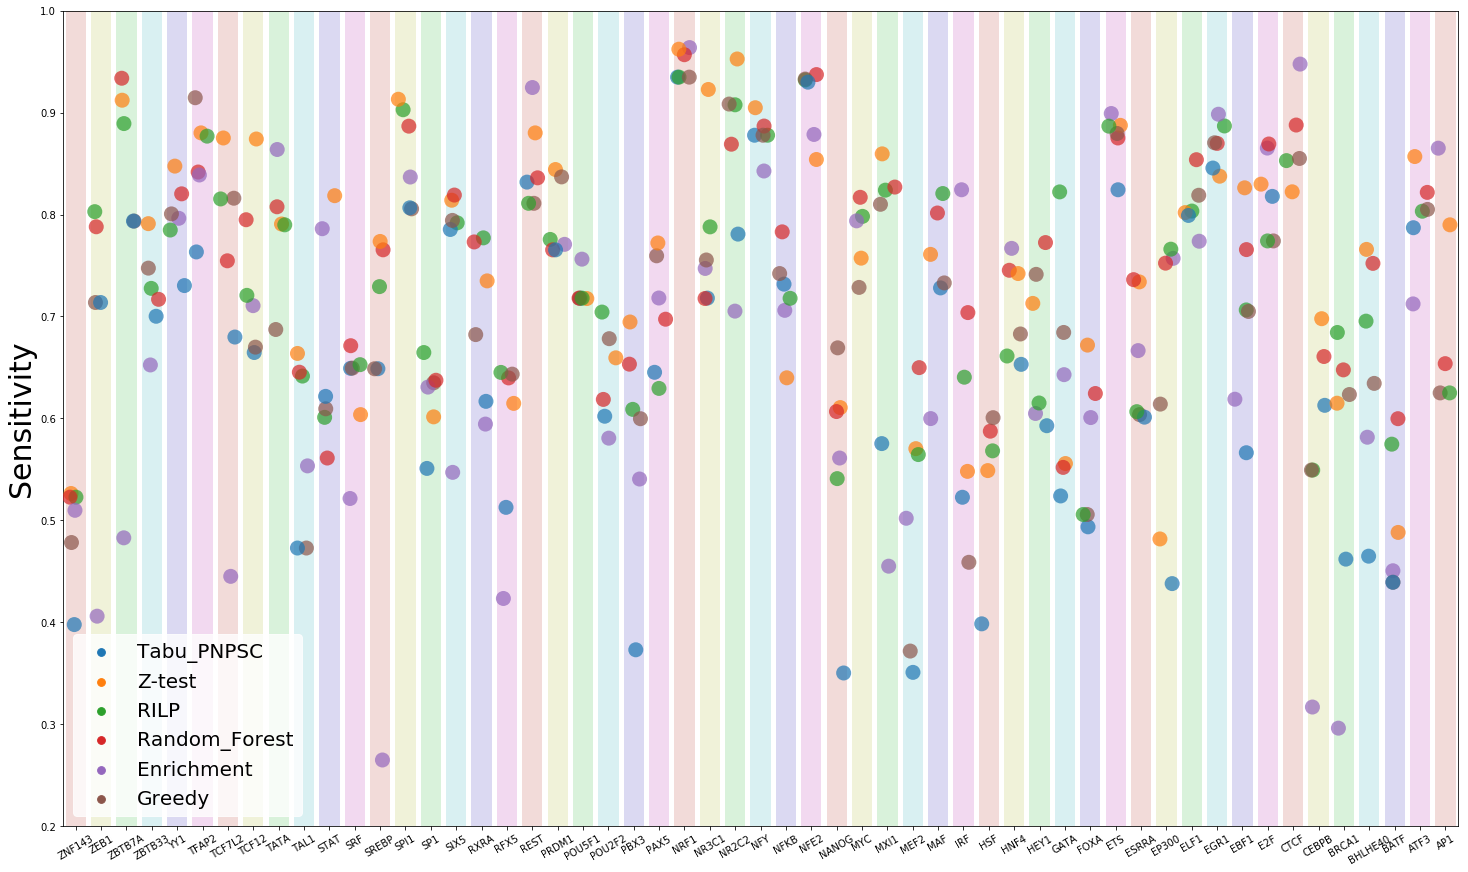

In [64]:
f, ax = plt.subplots(figsize=(25, 15))
# g=sns.pointplot(x="Groups", y="value",scale = 1.5,scatter_kws={"s": 100,'alpha':0.3}, hue="method",data=result[result['variable']=="Sensitivity"].sort_values('Groups', ascending=False),linestyles="")
g=sns.stripplot(x="Groups",jitter=0.3,alpha=0.7,size=15, y="value", hue="method",data=result[result['variable']=="Sensitivity"].sort_values('Groups', ascending=False))

# g=sns.lmplot(x="Groups",fit_reg=False, y="value",scatter_kws={"s": 100,'alpha':0.3}, hue="method",data=result[result['variable']=="Sensitivity"].sort_values('Groups', ascending=False))

g.set_xticklabels(g.get_xticklabels(),rotation=30)
handles, labels = ax.get_legend_handles_labels()
sns.barplot(x="Groups", y="value", data=test.sort_values('Groups', ascending=False),palette=sns.hls_palette(6,l=0.9))
# l = ax.legend(handles[6:], labels[6:], bbox_to_anchor=(0.09, 0.5), loc=2, borderaxespad=0.2,prop={'size': 20})
ax.tick_params(labelsize=10)
# l.draw_frame(True)
ax.set_xlabel('')
ax.set_ylabel('Sensitivity',fontsize=30)
legend = plt.legend(loc=3, prop={'size': 20},frameon = 1)
ax.set_ylim([0.2, 1])
# legend = plt.legend(frameon = 1)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')
# ax.set_title('Number of Motifs',fontsize=30)
plt.savefig("Sensitivity_stripplot.png",dpi=300)

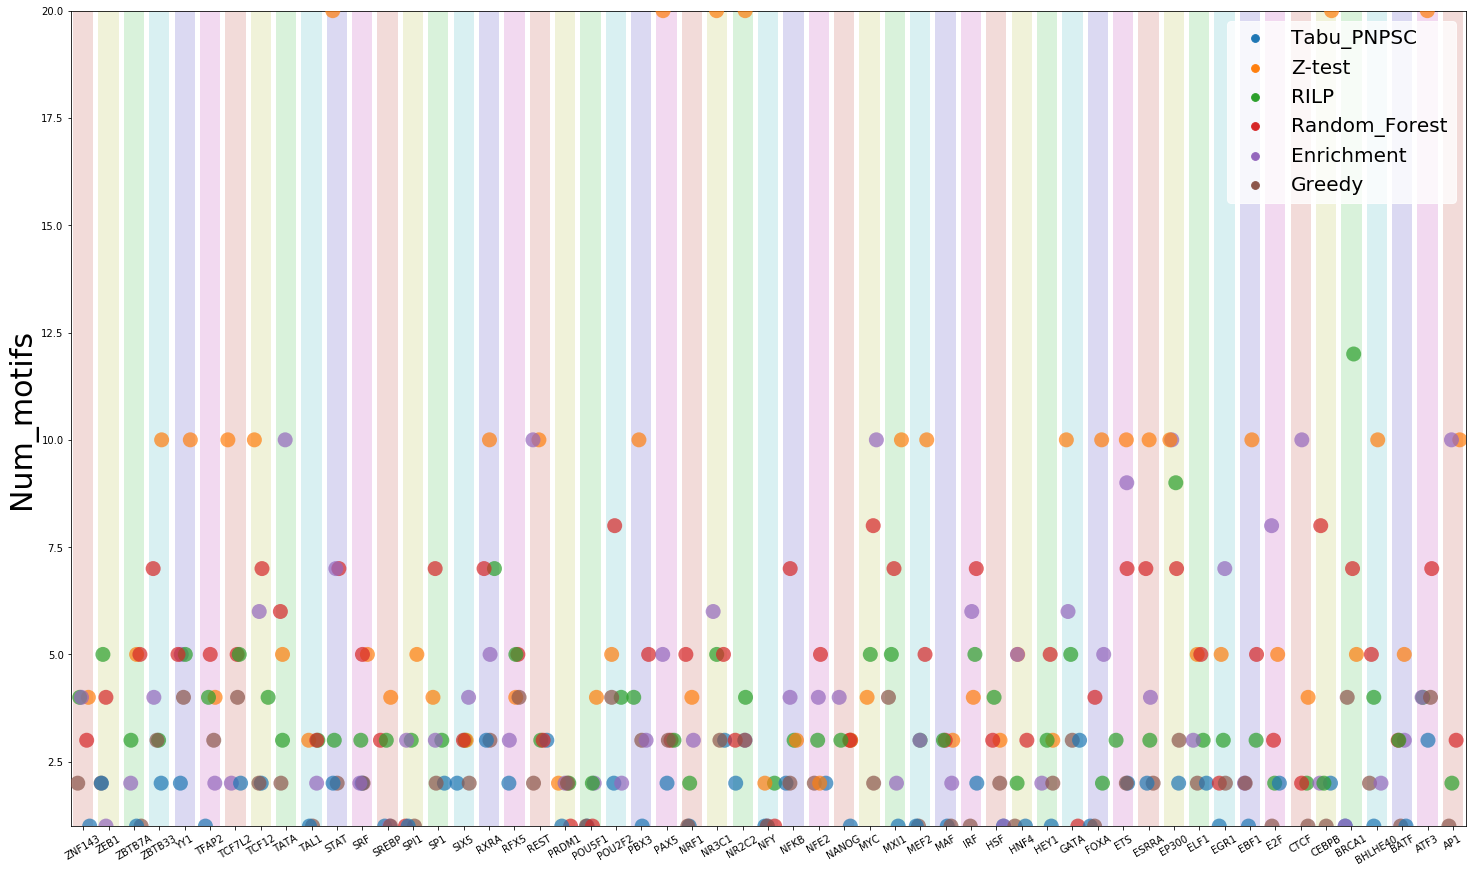

In [67]:
test = pd.DataFrame()
test['Groups'] = enrichment['Groups']
test['value'] = 100
### Num_motifs ##
f, ax = plt.subplots(figsize=(25, 15))
# g=sns.pointplot(x="Groups", y="value",scale = 1.5,scatter_kws={"s": 100,'alpha':0.3}, hue="method",data=result[result['variable']=="Num_motifs"].sort_values('Groups', ascending=False),linestyles="")
g=sns.stripplot(x="Groups",jitter=0.3,alpha=0.7,size=15, y="value", hue="method",data=result[result['variable']=="Num_motifs"].sort_values('Groups', ascending=False))

# g=sns.lmplot(x="Groups",fit_reg=False, y="value",scatter_kws={"s": 100,'alpha':0.3}, hue="method",data=result[result['variable']=="Num_motifs"].sort_values('Groups', ascending=False))

g.set_xticklabels(g.get_xticklabels(),rotation=30)
handles, labels = ax.get_legend_handles_labels()
sns.barplot(x="Groups", y="value", data=test.sort_values('Groups', ascending=False),palette=sns.hls_palette(6,l=0.9))
# l = ax.legend(handles[6:], labels[6:], bbox_to_anchor=(0.09, 0.5), loc=2, borderaxespad=0.2,prop={'size': 20})
ax.tick_params(labelsize=10)
# l.draw_frame(True)
ax.set_xlabel('')
ax.set_ylabel('Num_motifs',fontsize=30)
legend = plt.legend(loc=1, prop={'size': 20},frameon = 1)
# legend = plt.legend(frameon = 1)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')
ax.set_ylim([1, 20])
# ax.set_title('Number of Motifs',fontsize=30)
plt.savefig("Num_motifs_stripplot.png",dpi=300)


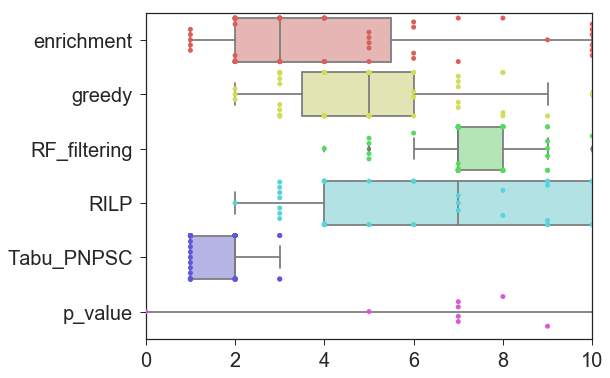

In [13]:
enrichment = pd.read_csv("enrichment_MS_summary.csv",usecols = [6],header = None)
enrichment.columns = ["Num_motifs"]
greedy = pd.read_csv("greedy_result.csv",usecols = [6],header = None)
greedy.columns = ["Num_motifs"]
p_value = pd.read_csv("p_value_result.csv",usecols = [6],header = None)
p_value.columns = ["Num_motifs"]
RF_filtering = pd.read_csv("RF_filtering_result.csv",usecols = [6],header = None)
RF_filtering.columns = ["Num_motifs"]
RILP = pd.read_csv("RILP_result.csv",usecols = [6],header = None)
RILP.columns = ["Num_motifs"]
Tabu_PNPSC = pd.read_csv("Tabu_PNPSC_result.csv",usecols = [6],header = None)
Tabu_PNPSC.columns = ["Num_motifs"]
enrichment_new = pd.melt(enrichment, value_vars=["Num_motifs"])
enrichment_new['method'] = "enrichment"
greedy_new = pd.melt(greedy, value_vars=["Num_motifs"])
greedy_new['method'] = "greedy"
p_value_new = pd.melt(p_value, value_vars=["Num_motifs"])
p_value_new['method'] = "p_value"
RF_filtering_new = pd.melt(RF_filtering, value_vars=["Num_motifs"])
RF_filtering_new['method'] = "RF_filtering"
RILP_new = pd.melt(RILP, value_vars=["Num_motifs"])
RILP_new['method'] = "RILP"
Tabu_PNPSC_new = pd.melt(Tabu_PNPSC, value_vars=["Num_motifs"])
Tabu_PNPSC_new['method'] = "Tabu_PNPSC"
frames = [enrichment_new, greedy_new, RF_filtering_new,RILP_new,Tabu_PNPSC_new,p_value_new]
result = pd.concat(frames)
f, ax = plt.subplots(figsize=(8, 6))
sns.set(style="ticks")

# Draw a nested boxplot to show bills by day and sex

sns.boxplot(x="value", y="method", data=result,palette=sns.hls_palette(6,l=0.8))

sns.swarmplot(x="value", y="method", data=result,split =True,palette=sns.hls_palette(6))
handles, labels = ax.get_legend_handles_labels()
ax.set_xlim([0, 10])
ax.tick_params(labelsize=20)
ax.set_xlabel('')
ax.set_ylabel('')
# When creating the legend, only use the first two elements
# to effectively remove the last two.
# l = plt.legend(handles[4:], labels[4:], bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

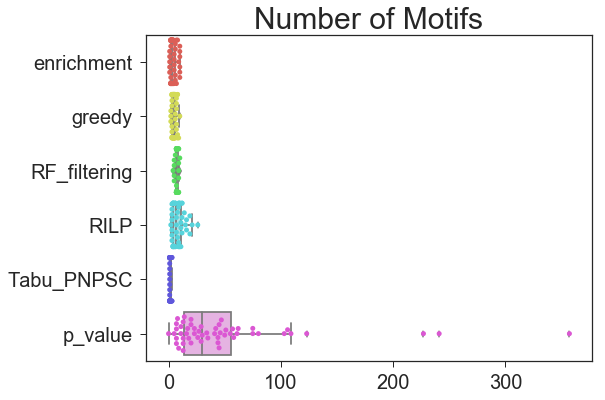

In [6]:

f, ax = plt.subplots(figsize=(8, 6))
sns.set(style="ticks")

# Draw a nested boxplot to show bills by day and sex

sns.boxplot(x="value", y="method", data=result,palette=sns.hls_palette(6,l=0.8))

sns.swarmplot(x="value", y="method", data=result,split =True,palette=sns.hls_palette(6))
handles, labels = ax.get_legend_handles_labels()
ax.tick_params(labelsize=20)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Number of Motifs',fontsize=30)

(0, 12)

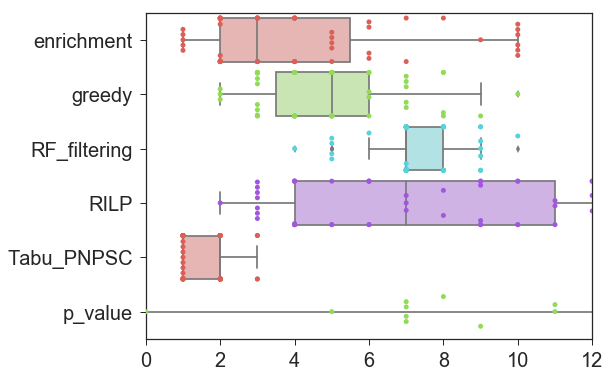

In [7]:

f, ax = plt.subplots(figsize=(8, 6))
sns.set(style="ticks")

# Draw a nested boxplot to show bills by day and sex

sns.boxplot(x="value", y="method", data=result,palette=sns.hls_palette(4,l=0.8))

sns.swarmplot(x="value", y="method", data=result,split =True,palette=sns.hls_palette(4))
handles, labels = ax.get_legend_handles_labels()
ax.tick_params(labelsize=20)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xlim([0, 12])
# ax.set_title('Number of Motifs',fontsize=30)

In [43]:
result.method.unique()

array(['enrichment', 'greedy', 'p_value', 'RF_filtering'], dtype=object)